In [6]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import library3 as lb

Ques 1:

In [2]:
#Generating the random number according to the question

rand1 = lb.rng(seed=11,a=65,m=1021,c=0)
rand2 = lb.rng(seed=11,a=572,m=16381,c=0)

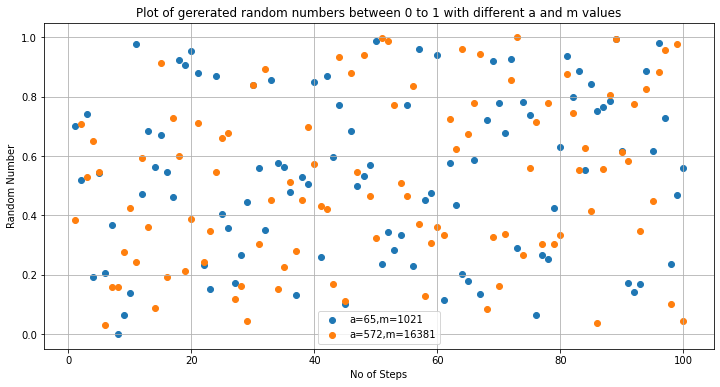

In [3]:
xlist = [i for i in range(1,101)]
ylist_1 = [rand1.gen() for i in range(1,101)]
ylist_2 = [rand2.gen() for i in range(1,101)]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(xlist,ylist_1,label='a=65,m=1021')
plt.scatter(xlist,ylist_2,label='a=572,m=16381')
plt.xlabel('No of Steps')
plt.ylabel('Random Number')
plt.title('Plot of gererated random numbers between 0 to 1 with different a and m values')
plt.legend()
plt.grid()
plt.show()

Ques 2:

In [4]:
def f(x):
    return np.cos(x)

#integration bounds
x_min = -np.pi/2
x_max = np.pi/2

#using the random no. generator in problem 1

I = lb.monte_integrate(f,x_min,x_max,10000,17,multiplier=572,m=16381,c=0)
print("The value of integral is ",I, "using 10000 points") 

The value of integral is  2.0065394710490914 using 10000 points


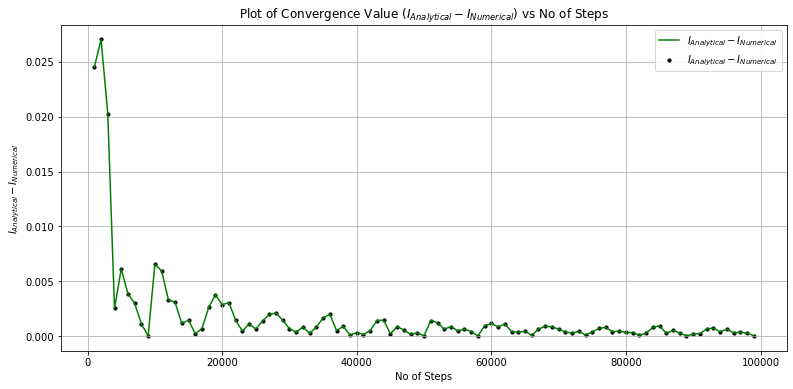

In [5]:
xlist = []
ylist = []
import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
for i in range(1000,100000,1000):
    xlist.append(i)
    ylist.append(abs(2-lb.monte_integrate(f,x_min,x_max,i,17,multiplier=572,m=16381,c=0)))

plt.plot(xlist,ylist,label=r'$I_{Analytical} - I_{Numerical}$',color='green')
plt.scatter(xlist,ylist,label=r'$I_{Analytical} - I_{Numerical}$',color='black',s=10)
plt.xlabel('No of Steps')
plt.ylabel(r'$I_{Analytical} - I_{Numerical}$')
plt.title(r'Plot of Convergence Value ($I_{Analytical} - I_{Numerical}$) vs No of Steps')
plt.legend()
plt.grid()
plt.show()


Ques 3:

Inverse Transform method

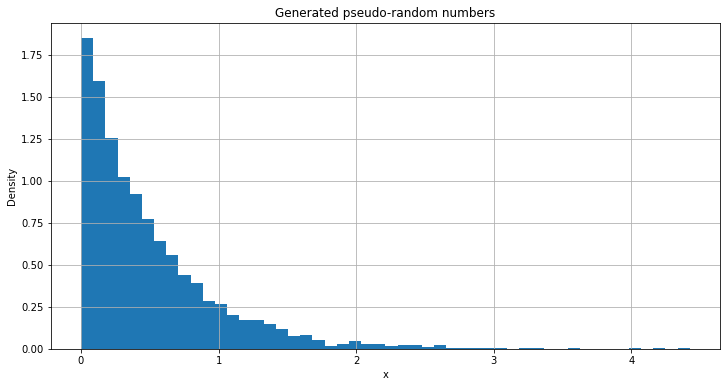

In [6]:

def inverse_cdf(u):
    return -np.log(u) / 2

n = 5000  # number of samples
u = np.random.uniform(0, 1, n)
x = inverse_cdf(u)

plt.figure(figsize = (12,6))
plt.hist(x, bins=50, density=True)
plt.title('Generated pseudo-random numbers')
plt.ylabel('Density')
plt.xlabel('x')
plt.grid()
plt.show()

Accept Reject Method

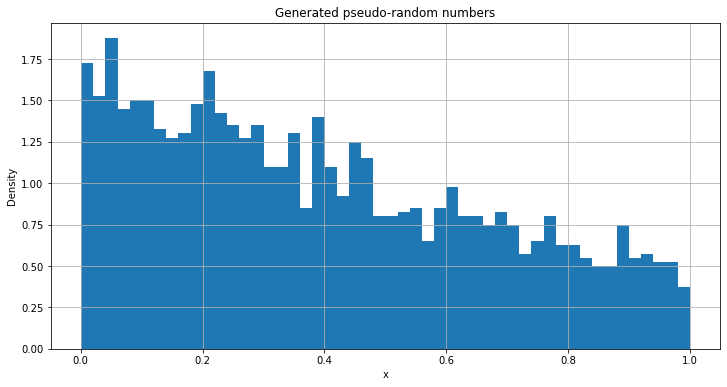

In [7]:
def sampling_dist(x):
    return 2-x

def target_dist(x):
    return math.exp(-2*x)

def accept_reject(n):
    samples = []
    M = 4  # Majorizing constant
    while len(samples) < n:
        x = np.random.uniform(0, 1)
        u = np.random.uniform(0, 1)
        if u <= target_dist(x) / (M * sampling_dist(x)):
            samples.append(x)
    return samples

samples = accept_reject(2000)

plt.figure(figsize = (12,6))
plt.hist(samples, bins=50, density=True)
plt.ylabel('Density')
plt.grid()
plt.xlabel('x')
plt.title('Generated pseudo-random numbers')
plt.show()


Ques 4:

In [3]:
limit = (0,2)
N = 10_000
func = lambda x:math.exp(-2*x)/(1+x**2)

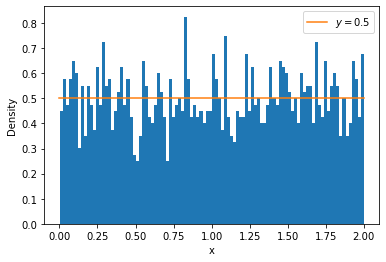

In [9]:
def F1(x):
    return 2*x
def p1(x):
    return 0.5

x = lb.LGC(no_sample=2000)
y_inverse_transform = []
for item in x:
    y_inverse_transform.append(F1(item))
    
plt.hist(y_inverse_transform,bins = 100,density = True)
plt.plot(np.arange(0,2.1,0.1),0.5*np.exp(0*np.arange(0,2.1,0.1)), label = r"$y = 0.5$")
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()


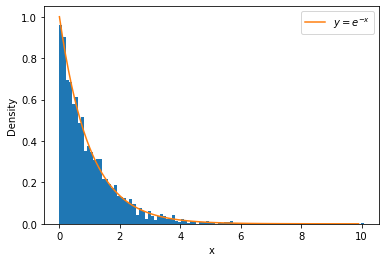

In [10]:
def F2(x):
    return -1*math.log(1-x)
def p2(x):
    return math.exp(-x)

x = lb.LGC(no_sample=2000)
y_inverse_transform = []
for item in x:
    y_inverse_transform.append(F2(item))
    
plt.hist(y_inverse_transform,bins = 100,density = True)
plt.plot(np.arange(0,10,0.1),np.exp(-1*np.arange(0,10,0.1)), label = r"$y = e^{-x}$")
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

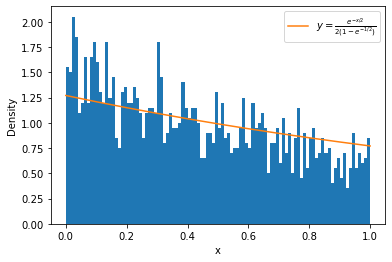

In [11]:
def F3(x): #After normalising
    return -1*math.log(1+x*(math.exp(-1)-1))
def p3(x):
    return (math.exp(-x/2))/(2*(1-math.exp(-0.5)))

x = lb.LGC(no_sample=2000)
y_inverse_transform = []
for item in x:
    y_inverse_transform.append(F3(item))
    
plt.hist(y_inverse_transform,bins = 100,density = True)
plt.plot(np.arange(0,1.1,0.1),1*np.exp(-1*np.arange(0,1.1,0.1)/2)/(2*(1-math.exp(-0.5))), label = r"$y = \frac{e^{-x/2}}{2(1-e^{-1/2})}$")
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

In [13]:
def monte_carlo_integration_important(N,limit,func,gen,p):
    """
    monte_carlo_integration: A function to calculate the integral of a function using the Monte-Carlo
    integration method

    args:
    N(int): The number of smaples to take for integration
    limit(Tupe): A tuple of the form (a,b) where a is the lower and b is the upper limit
    func(Method Object): The function which needs to be integrated
    """
    
    a,b = limit
    x = LGC(no_sample=N)
#     x = list(map(lambda si: a + (b-a)*si,x))

    weights = []
    for i in range(N):
        weights.append(func(gen(x[i]))/p(gen(x[i])))
    return np.array(weights).mean(),np.array(weights).var() 

In [14]:
F_uniform = lambda x:x
integral_F1,delta_F1 = monte_carlo_integration_important(N = 10000,
                                                         limit=(0,2),
                                                         func = func,
                                                         gen=F1,
                                                         p=p1)
integral_F2,delta_F2 = monte_carlo_integration_important(N = 10000,
                                                         limit=(0,2),
                                                         func = func,
                                                         gen=F2,
                                                         p=p2)
integral_F3,delta_F3 = monte_carlo_integration_important(N = 10000,
                                                         limit=(0,2),
                                                         func = func,
                                                         gen=F3,
                                                         p=p3)

In [15]:
print("Using the first function the value of the integral is ",integral_F1)
print("Using the second function the value of the integral is ",integral_F2)
print("Using the third function the value of the integral is ",integral_F3)
print("---------------------------------------------------------------")
print("The variance of the intergral using the first function is",delta_F1)
print("The variance of the intergral using the second function is",delta_F2)
print("The variance of the intergral using the third function is",delta_F3)

Using the first function the value of the integral is  0.3907249541754041
Using the second function the value of the integral is  0.39428105091169807
Using the third function the value of the integral is  0.40224042490967055
---------------------------------------------------------------
The variance of the intergral using the first function is 0.26593064816825795
The variance of the intergral using the second function is 0.10503066742571228
The variance of the intergral using the third function is 0.04440296375388081


Hence as we make the sampling more specialised the variance reduces sugesting a faster convergence, P3 gives the best convergence , as we can see.